In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from scipy.stats import randint

Primeras 5 filas del Dataset:
   Distancia (km)  Duracion (horas)  Cantidad de escalas  \
0          4058.0               1.7                  300   
1          9532.0               8.4                  300   
2          7454.0               8.6                  300   
3          6187.0               9.9                  300   
4          1982.0              11.2                  300   

   Edad promedio flota (años)  Precio (USD)  
0                         7.6      15341.60  
1                         7.6      15856.99  
2                         1.6      15761.30  
3                        11.4      15669.60  
4                        11.2      15365.90  


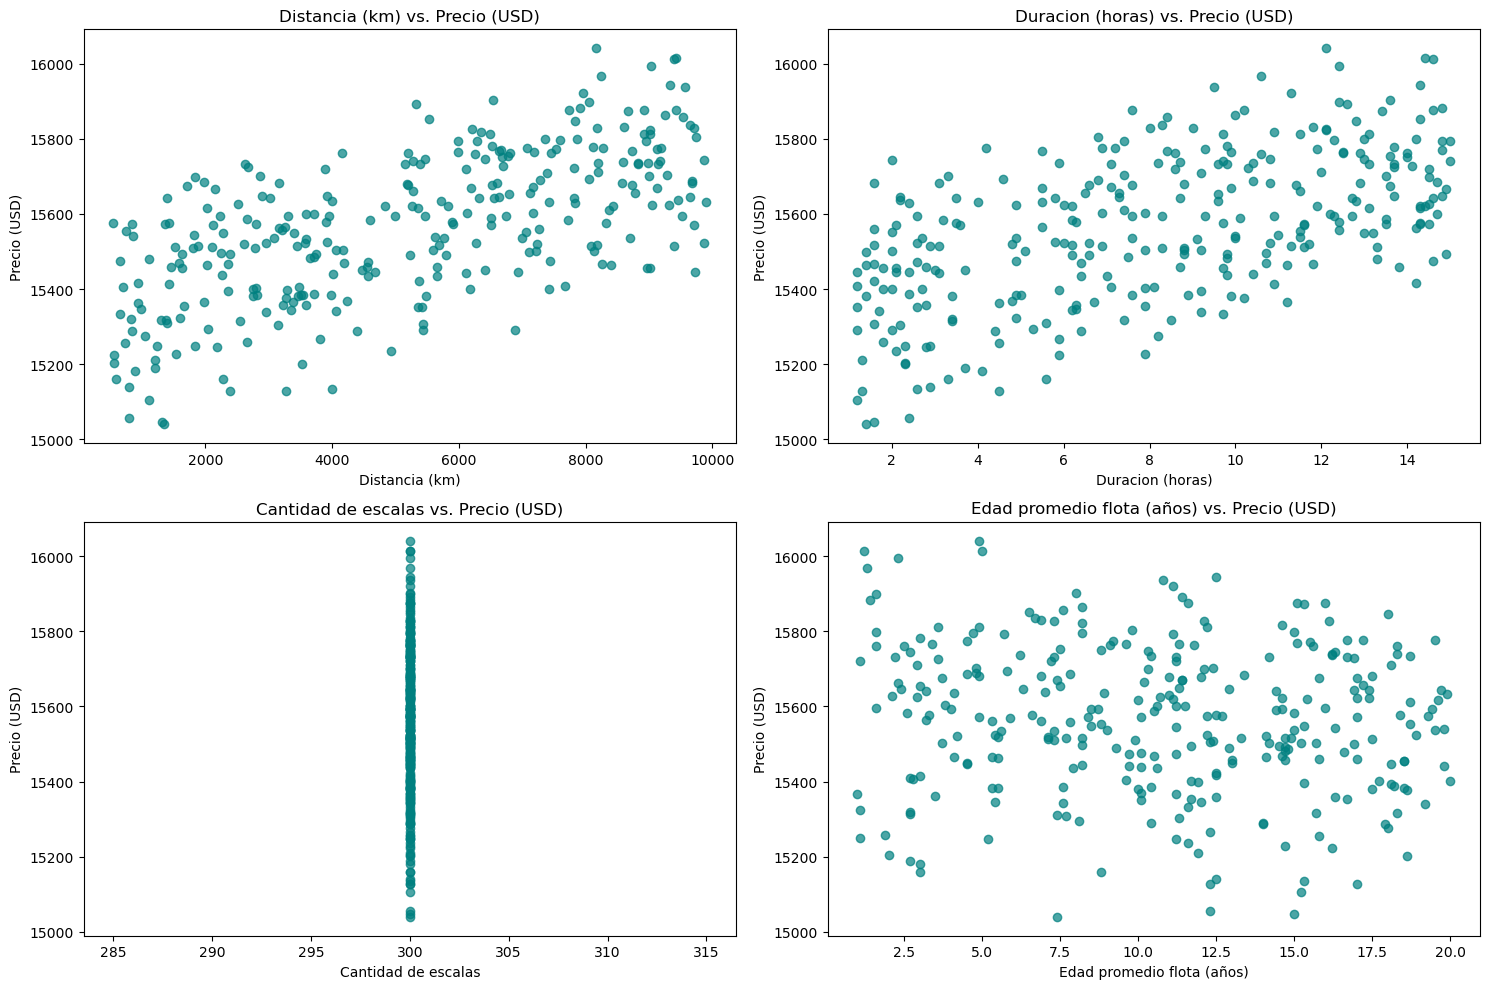

In [7]:
# Creación del Dataset (N=300 vuelos)
np.random.seed(42)
N = 300

# Variables (Características)
distancia = np.random.uniform(500, 10000, N)
duracion = np.random.uniform(1, 15, N)
escalas = randint.rvs(0, 4, N)
edad_flota = np.random.uniform(1, 20, N)

# Variable Objetivo (Precio), simulando una relación lineal positiva con distancia/duración/escalas
precio_base = 100
precio = (
    precio_base +
    0.05 * distancia +
    30 * duracion +
    50 * escalas -
    5 * edad_flota +
    np.random.normal(0, 75, N)
)
precio[precio < 50] = 50 # Asegurar precio mínimo

data = {
    'Distancia (km)': distancia.round(0),
    'Duracion (horas)': duracion.round(1),
    'Cantidad de escalas': escalas,
    'Edad promedio flota (años)': edad_flota.round(1),
    'Precio (USD)': precio.round(2)
}

df = pd.DataFrame(data)
print("Primeras 5 filas del Dataset:")
print(df.head())

# Visualización (Scatter Plots) (Requisito 1)
features = ['Distancia (km)', 'Duracion (horas)', 'Cantidad de escalas', 'Edad promedio flota (años)']
target = 'Precio (USD)'

plt.figure(figsize=(15, 10))
for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    plt.scatter(df[col], df[target], color='teal', alpha=0.7)
    plt.title(f'{col} vs. {target}')
    plt.xlabel(col)
    plt.ylabel(target)

plt.tight_layout()
plt.show()

## ¿Cómo Salen los 4 Gráficos Juntos?

La clave para mostrar los cuatro gráficos en una única figura es la función `plt.subplot(filas, columnas, posición)` de la librería `matplotlib.pyplot`.

### 1. Definición de la Cuadrícula

La línea `plt.subplot(2, 2, i + 1)` establece que se desea una distribución de:

- 2 filas  
- 2 columnas  

Esto crea una cuadrícula de \(2 \times 2\), permitiendo un total de 4 gráficos.

### 2. Uso del Bucle y Posición Dinámica

El código utiliza un bucle `for` que itera 4 veces (una vez por cada característica en la lista `features`) para dibujar cada gráfico en la posición correcta.

- **Bucle de Dibujo**: El bucle utiliza el índice `i` (que va de 0 a 3) para controlar dónde se dibuja cada gráfico.
- **Posición Dinámica**: El argumento final de `plt.subplot`, `i + 1`, cambia en cada iteración para seleccionar la celda de la cuadrícula.


In [8]:
# Definir X e y
X = df[features]
y = df[target]

# Dividir en entrenamiento y prueba (Requisito 2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalar los datos con StandardScaler (Requisito 2)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Datos de entrenamiento escalados: {X_train_scaled.shape}")

Datos de entrenamiento escalados: (210, 4)


In [9]:
# Encontrar el k óptimo (Requisito 2)
max_k = 20
k_range = range(1, max_k + 1)
mse_values = []

for k in k_range:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    mse_values.append(mean_squared_error(y_test, y_pred))

# Encontrar el k con el MSE más bajo
optimal_k = k_range[np.argmin(mse_values)]
min_mse = np.min(mse_values)

print(f"\nEl valor óptimo de n_neighbors (k) es: {optimal_k}")
print(f"El MSE mínimo asociado es: {min_mse:.2f}")

# Reentrenar el mejor modelo
knn_best = KNeighborsRegressor(n_neighbors=optimal_k)
knn_best.fit(X_train_scaled, y_train)
y_pred_best = knn_best.predict(X_test_scaled)

# Evaluación final (Requisito 3)
final_mse = mean_squared_error(y_test, y_pred_best)
final_r2 = r2_score(y_test, y_pred_best)

print("\n--- Evaluación del Modelo Óptimo (Escalado) ---")
print("Error Cuadrático Medio (MSE): {final_mse:.2f}")
print("Coeficiente de Determinación (R2 Score): {final_r2:.4f}")


El valor óptimo de n_neighbors (k) es: 8
El MSE mínimo asociado es: 7877.69

--- Evaluación del Modelo Óptimo (Escalado) ---
Error Cuadrático Medio (MSE): {final_mse:.2f}
Coeficiente de Determinación (R2 Score): {final_r2:.4f}


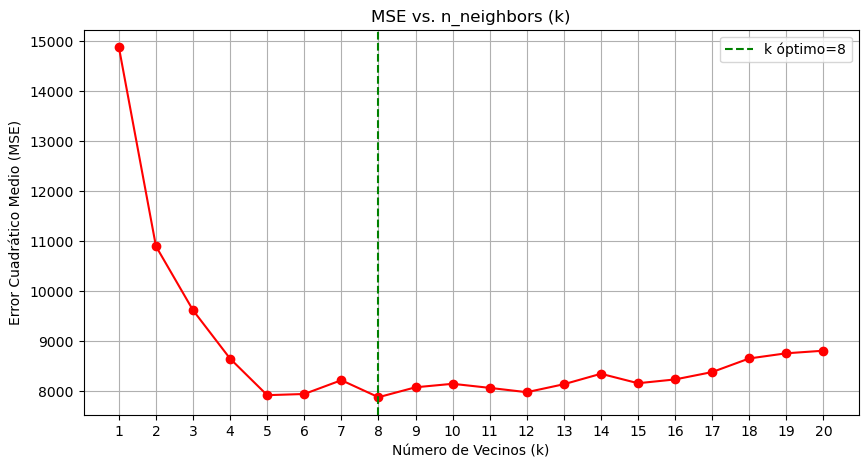

In [10]:
plt.figure(figsize=(10, 5))
plt.plot(k_range, mse_values, marker='o', linestyle='-', color='red')
plt.axvline(x=optimal_k, color='green', linestyle='--', label=f'k óptimo={optimal_k}')
plt.title('MSE vs. n_neighbors (k)')
plt.xlabel('Número de Vecinos (k)')
plt.ylabel('Error Cuadrático Medio (MSE)')
plt.xticks(k_range)
plt.legend()
plt.grid(True)
plt.show()

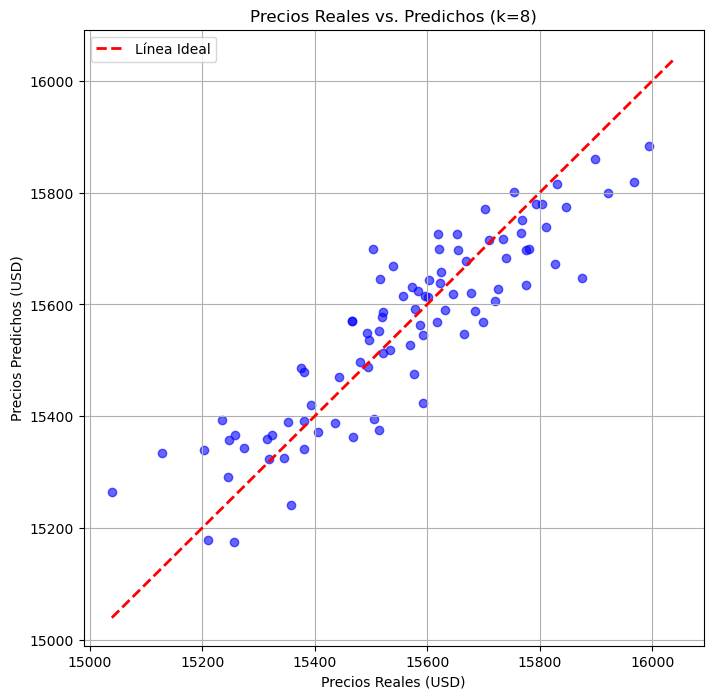

In [11]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred_best, color='blue', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2, label='Línea Ideal')
plt.xlabel('Precios Reales (USD)')
plt.ylabel('Precios Predichos (USD)')
plt.title(f'Precios Reales vs. Predichos (k={optimal_k})')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
# Análisis de correlación (Requisito 4)
correlation_matrix = df.corr()
price_correlation = correlation_matrix[target].sort_values(ascending=False)

print("\n--- Correlación de Variables con el Precio (USD) ---")
print(price_correlation)

most_correlated_feature = price_correlation[1:].abs().idxmax()
print(f"\nLa variable con mayor correlación (valor absoluto) con el Precio es: {most_correlated_feature}")


--- Correlación de Variables con el Precio (USD) ---
Precio (USD)                  1.000000
Distancia (km)                0.641244
Duracion (horas)              0.571838
Edad promedio flota (años)   -0.120793
Cantidad de escalas                NaN
Name: Precio (USD), dtype: float64

La variable con mayor correlación (valor absoluto) con el Precio es: Distancia (km)


In [13]:
# Predicciones para 3 rutas nuevas (Requisito 4)
nuevas_rutas_data = {
    'Distancia (km)': [800, 5500, 9500],
    'Duracion (horas)': [1.5, 7.0, 14.0],
    'Cantidad de escalas': [0, 1, 3],
    'Edad promedio flota (años)': [15.0, 5.0, 10.0]
}
nuevas_rutas_df = pd.DataFrame(nuevas_rutas_data)

# Escalar los nuevos datos
X_new = nuevas_rutas_df[features]
X_new_scaled = scaler.transform(X_new)

# Hacer las predicciones
predicciones_nuevas = knn_best.predict(X_new_scaled).round(2)

# Mostrar resultados
nuevas_rutas_df['Precio Predicho (USD)'] = predicciones_nuevas

print("\n--- Predicciones para 3 Rutas Nuevas (k={optimal_k}) ---")
print(nuevas_rutas_df)


--- Predicciones para 3 Rutas Nuevas (k={optimal_k}) ---
   Distancia (km)  Duracion (horas)  Cantidad de escalas  \
0             800               1.5                    0   
1            5500               7.0                    1   
2            9500              14.0                    3   

   Edad promedio flota (años)  Precio Predicho (USD)  
0                        15.0               15176.27  
1                         5.0               15579.93  
2                        10.0               15857.00  
